** Dataset Breast Cancer Wisconsin **

In [1]:
# Leitura do dataset diretamente do website da UCI com pandas
import numpy as np
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'breast-cancer-wisconsin/wdbc.data',
                 header=None)

In [2]:
# Coloca as 30 features num NumPy array X os label num array y
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [3]:
# Transforma as representações 'M' e 'B' dos labels para inteiros
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
# Mostra como a transformação é feita
le.transform(['M', 'B'])

array([1, 0])

In [5]:
# Divide os dados entre treino (80%) e teste (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

** Pipeline **

O objeto pipeline recebe como entrada uma lista de tuplas (identificador, valor) sobre as quais executaremos operações de transformação e classficação

Neste exemplo temos 2 transfromadores e 1 classificador:
- Features na mesma escala
- Redução de dimensionalidade
- Regressão logistica

![Pipeline](imgs/pipeline.png)

In [7]:
# Definição e execução do pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Acurácia do teste: %.3f' % pipe_lr.score(X_test, y_test))

Acurácia do teste: 0.947


In [8]:
# Inicializa o StratifiedKFold com 10 folds sobre os labels y_train 
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=1)

In [9]:
# Executa a validação cruzada conforme definido em kfold
# A lista scores armazenará todos os resultados
scores = []
for k, (train, val) in enumerate(kfold.split(X_train, y_train)):
    # As variáveis train e val contém os índices dos exemplos 
    # de treino e validação, respectivamente
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[val], y_train[val])
    scores.append(score)
    print('Fold: %2d, Dist. do treino: %s, Dist. da validação: %s, Acc: %.3f' % (k+1,
                    np.bincount(y_train[train]), np.bincount(y_train[val]), score))

Fold:  1, Dist. do treino: [256 153], Dist. da validação: [29 17], Acc: 0.891
Fold:  2, Dist. do treino: [256 153], Dist. da validação: [29 17], Acc: 0.978
Fold:  3, Dist. do treino: [256 153], Dist. da validação: [29 17], Acc: 0.978
Fold:  4, Dist. do treino: [256 153], Dist. da validação: [29 17], Acc: 0.913
Fold:  5, Dist. do treino: [256 153], Dist. da validação: [29 17], Acc: 0.935
Fold:  6, Dist. do treino: [257 153], Dist. da validação: [28 17], Acc: 0.978
Fold:  7, Dist. do treino: [257 153], Dist. da validação: [28 17], Acc: 0.933
Fold:  8, Dist. do treino: [257 153], Dist. da validação: [28 17], Acc: 0.956
Fold:  9, Dist. do treino: [257 153], Dist. da validação: [28 17], Acc: 0.978
Fold: 10, Dist. do treino: [257 153], Dist. da validação: [28 17], Acc: 0.956


In [10]:
print('Acurácia Cross Validada: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Acurácia Cross Validada: 0.950 +/- 0.029


In [11]:
# Alternativa de validação cruzada dentro do Scikit-learn
# Esta função lê dados estratificados por padrão
from sklearn.model_selection import cross_val_score
scores_2 = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('Acurácias por iteração: %s' % scores_2)

Acurácias por iteração: [0.89130435 0.97826087 0.97826087 0.91304348 0.93478261 0.97777778
 0.93333333 0.95555556 0.97777778 0.95555556]


In [12]:
print('Acurácia Cross Validada: %.3f +/- %.3f' % (np.mean(scores_2), np.std(scores_2)))

Acurácia Cross Validada: 0.950 +/- 0.029


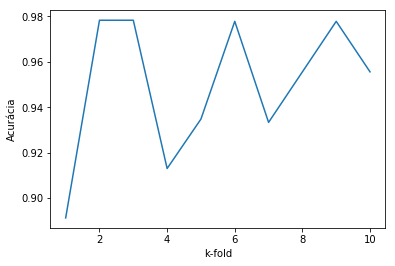

In [32]:
import matplotlib.pyplot as plt
k_range = list(range(1, 11))
k_scores = scores_2

plt.plot(k_range, k_scores)
plt.xlabel('k-fold')
plt.ylabel('Acurácia')
plt.show()

## Outras métricas além da acurácia

In [14]:
# F1
scores_3 = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         scoring='f1_macro',
                         n_jobs=1)
print('F1 Macro Cross Validada: %.3f +/- %.3f' % (np.mean(scores_3), np.std(scores_3)))

F1 Macro Cross Validada: 0.946 +/- 0.031


In [15]:
# Acurácia normalizada / balanceada
scores_4 = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         scoring='recall_macro',
                         n_jobs=1)
print('Acurácia Normalizada Cross Validada: %.3f +/- %.3f' % (np.mean(scores_4), np.std(scores_4)))

Acurácia Normalizada Cross Validada: 0.946 +/- 0.027


** Todas as métricas **

In [16]:
from sklearn.metrics import SCORERS
for k, v in SCORERS.items():
    print(k)

explained_variance
r2
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_squared_error
neg_mean_squared_log_error
median_absolute_error
mean_absolute_error
mean_squared_error
accuracy
roc_auc
average_precision
log_loss
neg_log_loss
adjusted_rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted


** Comparação de modelos **

In [17]:
# 10-fold CV com KNN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=20)
print('Acurácia da CV   : %.3f' % cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='accuracy').mean())
y_pred = knn_clf.fit(X_train, y_train).predict(X_test)
print('Acurácia do teste: %.3f' % accuracy_score(y_test, y_pred))

Acurácia da CV   : 0.932
Acurácia do teste: 0.912


In [18]:
# 10-fold CV com SVM linear
from sklearn import svm
svm_clf = svm.SVC(kernel='linear', C=0.1)
print('Acurácia da CV   : %.3f' % cross_val_score(svm_clf, X_train, y_train, cv=10, scoring='accuracy').mean())
y_pred = svm_clf.fit(X_train, y_train).predict(X_test)
print('Acurácia do teste: %.3f' % accuracy_score(y_test, y_pred))

Acurácia da CV   : 0.952
Acurácia do teste: 0.947


In [19]:
# 10-fold CV com Logistic Regression
lr_clf = LogisticRegression()
print('Acurácia da CV   : %.3f' % cross_val_score(lr_clf, X_train, y_train, cv=10, scoring='accuracy').mean())
y_pred = lr_clf.fit(X_train, y_train).predict(X_test)
print('Acurácia do teste: %.3f' % accuracy_score(y_test, y_pred))

Acurácia da CV   : 0.945
Acurácia do teste: 0.956


** Logistic Regression versus SVM linear: **
De modo geral, ambos possuem resultados similares. LR é mais suscetível a outliner por tentar maximizar as probabilidades condionais do treino. SVMs se preocupam mais com os support vectors (pontos próximos do hiperplano). 

## Seleção de features 

** Dataset Adverstising **

In [20]:
# Carrega o dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [21]:
# Cria uma lista com 3 features
feature_cols = ['TV', 'radio', 'newspaper']

# Seleciona um subset do DataFrame com a lista de features 
X = data[feature_cols]

# Seleciona a coluna Sales como resposta
y = data.sales

** Devemos manter a coluna newspaper na regressão? **

In [22]:
# 10-fold CV com todas as 3 features
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [23]:
# Ajusta o sinal dos scores MSE
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [24]:
# Converte de MSE para RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [25]:
# Calcula o RMSE médio
print(rmse_scores.mean())

1.6913531708051797


In [26]:
# 10-fold CV com 2 features (excluindo newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766


** Verificando **

Método estatístico univariado para selecionar as melhores features:
- SelectKBest remove todas as features exceto as top-k com melhor score
- f_regression estima o grau de dependencia linear entre 2 variáveis aleatórias

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
print('Formato original {}'.format(X.shape))

X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
print('Formato sem a feature newspaper {}'.format(X_new.shape))

Formato original (200, 3)
Formato sem a feature newspaper (200, 2)


## Curvas de Validação

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [29]:
digits = load_digits()
X, y = digits.data, digits.target

In [30]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

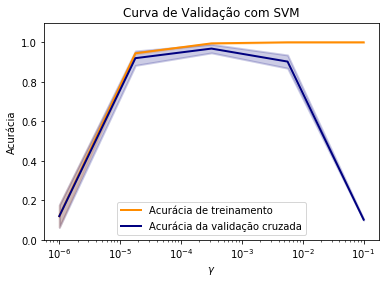

In [31]:
plt.title("Curva de Validação com SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Acurácia")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Acurácia de treinamento",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Acurácia da validação cruzada",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

- O plot mostra diferentes valores para o parâmetro gamma.
- Esquerda: valores baixo para ambos --> underfitting
- Direita: valor baixo apenas para validação, mas alto no treino --> overfitting
- Centro: Melhores valores para gamma